<a href="https://colab.research.google.com/github/MingzheHu-Duke/BrownELVO/blob/main/ExternalValidationDataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [307]:
train_cleaned_df = pd.read_csv("/content/brown_elvo_cleaned_2_23.csv", engine="python")

Recall what are the features we used for training our models

In [308]:
train_cleaned_df.head()

,Accession_Number,occlusion_or_not,Old_mRS,30_Days_mRs,Acute_or_chronic,Patient_Sex,Patient_Age,X_ShamAccessionNumber,vessels,Location,Passes_time
0,52818203,occlusion,1,0,chronic,Male,77,7a603e8495ee6583a204a2c0db629608,Chronic left M1 occlusion,M1,NaN
1,53195738,occlusion,1,1,acute,Male,52,2f01364ffa79d159ef9a106c89437197,right internal carotid artery,ICA,NaN
2,52990262,occlusion,4,3,chronic,Male,69,65397fc8c232d46a463cda07f4151607,M1 segment left MCA.\r\n,M1,NaN
3,53277488,occlusion,2,2,chronic,Female,54,391ae8eb152bbe38907c6fd18200e9a1,basilar artery and right vertebral artery,10,NaN
4,51080603,occlusion,5,3,chronic,Male,78,d8f857bbd5b0288bc97e9786ddf461a9,M1 segment of the right MCA,NaN,NaN


In [309]:
# Show the column names and types
print("Data types of each columns:")
print(train_cleaned_df.dtypes)
print(len(train_cleaned_df.columns))

Data types of each columns:
Accession_Number          int64
occlusion_or_not         object
Old_mRS                   int64
30_Days_mRs               int64
Acute_or_chronic         object
Patient_Sex              object
Patient_Age               int64
X_ShamAccessionNumber    object
vessels                  object
Location                 object
Passes_time              object
dtype: object
11


Now lets load the test data between 2016 and 2018

Tried to load the data into data frame but it seems that it include null data

In [310]:
if '\0' in open('/content/search_stroke_2016_6_1_2017_12_31完成penn-msj5.5.xls', encoding="ISO-8859-1").read():
    print("you have null bytes in your input file")
else:
    print("you don't")

you have null bytes in your input file


It seems that the problem is caused by the empty lines at the end of the csv file, so I manually removed them and name the new csv file as stroke_2016_2017.csv

In [311]:
test_2016_7_df = pd.read_csv("/content/stroke_2016_2017.csv.csv")

In [312]:
n_row = test_2016_7_df.shape[0]
print("The number of observations are: {}".format(n_row))

The number of observations are: 183


In [313]:
test_2016_7_df.head()

,Organization,Point of Care,Source System,Accession Number,MRN,DSA,note,TICI,Acute or chronic diagnosis of the cause,pass time,Exam Started Date,prior treatment mRs,prior treatment 30 day,posttreatment 30 day mRs,Modality,Exam Code,Exam Description,CPT Code,Report Text,Is Stat,Patient Status,occlusion or not,Acute or chronic,vessels,取栓,标注,Patient Sex,Patient Age,Ordered By,Ordered Date,Scheduled By,Scheduled Date,Patient Arrived By,Patient Arrived Date,Exam Started By,Exam Started Date.1,Exam Completed By,Exam Completed Date,Report Created By,Report Created Date,...,Ordered to Scheduled (minutes),Ordered to Exam Started (minutes),Ordered to Exam Completed (minutes),Ordered to Report Created (minutes),Ordered to Preliminary Report (minutes),Ordered to Report Finalized (minutes),Ordered to Report Addendum (minutes),Scheduled to Exam Started (minutes),Scheduled to Exam Completed (minutes),Scheduled to Report Created (minutes),Scheduled to Preliminary Report (minutes),Scheduled to Report Finalized (minutes),Scheduled to Report Addendum (minutes),Exam Started to Exam Completed (minutes),Exam Started to Report Created (minutes),Exam Started to Preliminary Report (minutes),Exam Started to Report Finalized (minutes),Exam Started to Report Addendum (minutes),Exam Completed to Report Created (minutes),Exam Completed to Preliminary Report (minutes),Exam Completed to Report Finalized (minutes),Exam Completed to Report Addendum (minutes),Report Created to Preliminary Report (minutes),Report Created to Report Finalized (minutes),Report Created to Report Addendum (minutes),Preliminary Report to Report Finalized (minutes),Preliminary Report to Report Addendum (minutes),Report Finalized to Report Addendum (minutes),Work (RVU),PE (RVU),MP (RVU),Work (Professional) (RVU),PE (Professional) (RVU),MP (Professional) (RVU),Work (Technical) (RVU),PE (Technical) (RVU),MP (Technical) (RVU),Total (RVU),Total (Professional) (RVU),Total (Technical) (RVU)
0,UPHS,PENN PRESBYTERIAN MEDICAL CENTER,EPIC,29245949,452152002,not,NaN,NaN,MRIShow acute,NaN,12/6/2017 15:43,1,2017/12/9,1,CT,CTHDCAZ,CT HEAD ARTERIOGRAM W AND WO IV CONTRAST,70496,History: 65-year-old man with history of prior...,True,Emergency,occlusion,chronic,left mid M1 branch,4,And everything else as 0,Male,65,"FURIA, FRANCES",12/6/2017 15:28,NaN,12/6/2017 15:45,NaN,12/6/2017 15:34,NaN,12/6/2017 15:43,NaN,12/6/2017 16:13,NaN,NaN,...,17,15,45,NaN,NaN,88,NaN,-2,28,NaN,NaN,71,NaN,30,NaN,NaN,73,NaN,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,8.28,NaN,1.75,2.50,NaN,0,5.78,NaN,10.03,4.25,5.78
1,UPHS,HUP,EPIC,28986404,15138217,not,NaN,NaN,MRI,NaN,10/5/2017 18:35,2,2017/10/9,2,CT,CTHDCAZ,CT HEAD ARTERIOGRAM W AND WO IV CONTRAST,70496,HISTORY: 53-year-old man with history of ische...,True,Emergency,occlusion,chronic,proximal M1 segment of the right MCA,2,NaN,Male,53,"TERAN-MERINO, FELIPE",10/5/2017 18:14,NaN,10/5/2017 18:15,NaN,10/5/2017 18:18,NaN,10/5/2017 18:35,NaN,10/5/2017 18:59,NaN,NaN,...,1,21,45,NaN,135.0,156,NaN,20,44,NaN,134.0,155,NaN,24,NaN,114.0,135,NaN,NaN,90.0,111,NaN,NaN,NaN,NaN,21.0,NaN,NaN,1.75,8.28,NaN,1.75,2.50,NaN,0,5.78,NaN,10.03,4.25,5.78
2,UPHS,HUP,EPIC,27433774,50034818,not,Thrombectomy,pro-op0/post-op3,Thrombectomy,NaN,8/9/2016 9:09,4,2016/9/14,5,CT,CTHDCAZ,CT HEAD ARTERIOGRAM W AND WO IV CONTRAST,70496,Indication: Left MCA stroke\n TECHNIQUE: CT an...,True,Emergency,occlusion,chronic,left M1,4,NaN,Male,73,"REYES, IRIS",8/9/2016 8:54,NaN,8/9/2016 8:55,NaN,8/9/2016 8:57,NaN,8/9/2016 9:09,NaN,8/9/2016 9:23,NaN,NaN,...,1,15,29,NaN,39.0,87,4365.0,14,28,NaN,38.0,86,4364.0,14,NaN,24.0,72,4350.0,NaN,10.0,58,4336.0,NaN,NaN,NaN,48.0,4326.0,4278.0,1.75,8.28,NaN,1.75,2.49,NaN,0,5.79,NaN,10.03,4.24,5.79
3,UPHS,PENN PRESBYTERIAN MEDICAL CENTER,EPIC,29284027,44332567,not,NaN,NaN,Medical history andCTA,NaN,12/15/2017 10:06,2,2018/1/16,1,CT,CTHDCAZ,CT HEAD ARTERIOGRAM W AND WO IV CONTRAST,70496,Clinical information: 77-year-old woman with h...,True,Emergency,occlusion,chronic,left vertebral artery at

In [314]:
# Show the column names and types
print("columns:")
test_2016_7_df.columns

columns:


Index(['Organization', 'Point of Care', 'Source System', 'Accession Number',
       'MRN', 'DSA', 'note', 'TICI', 'Acute or chronic diagnosis of the cause',
       'pass time', 'Exam Started Date', 'prior treatment mRs',
       'prior treatment 30 day', 'posttreatment 30 day mRs', 'Modality',
       'Exam Code', 'Exam Description', 'CPT Code', 'Report Text', 'Is Stat',
       'Patient Status', 'occlusion or not', 'Acute or chronic', ' vessels',
       '取栓', '标注', 'Patient Sex', 'Patient Age', 'Ordered By', 'Ordered Date',
       'Scheduled By', 'Scheduled Date', 'Patient Arrived By',
       'Patient Arrived Date', 'Exam Started By', 'Exam Started Date.1',
       'Exam Completed By', 'Exam Completed Date', 'Report Created By',
       'Report Created Date', 'Preliminary Report By',
       'Preliminary Report Date', 'Report Finalized By',
       'Report Finalized Date', 'Report Addendum By', 'Report Addendum Date',
       'Ordered to Scheduled (minutes)', 'Ordered to Exam Started (minutes

Now lets only keep the columns we need

In [315]:
col_list = ["Accession Number", "occlusion or not", "prior treatment mRs",
            "posttreatment 30 day mRs", "Acute or chronic", "Patient Sex",
            "Patient Age", " vessels", "pass time"]
print(col_list)

['Accession Number', 'occlusion or not', 'prior treatment mRs', 'posttreatment 30 day mRs', 'Acute or chronic', 'Patient Sex', 'Patient Age', ' vessels', 'pass time']


In [316]:
test_2016_7_selected = test_2016_7_df[col_list]
test_2016_7_selected.head()

,Accession Number,occlusion or not,prior treatment mRs,posttreatment 30 day mRs,Acute or chronic,Patient Sex,Patient Age,vessels,pass time
0,29245949,occlusion,1,1,chronic,Male,65,left mid M1 branch,NaN
1,28986404,occlusion,2,2,chronic,Male,53,proximal M1 segment of the right MCA,NaN
2,27433774,occlusion,4,5,chronic,Male,73,left M1,NaN
3,29284027,occlusion,2,1,chronic,Female,77,left vertebral artery at its origin,NaN
4,29203810,occlusion,2,1,chronic,Male,92,proximal left M2segment,NaN


Since we do not have the Sham Accession Number in the test data, we duplicate the Accesion Number Column and name it as the Sham Accession Number.

In [317]:
# Duplicate one column
buffer_df = test_2016_7_selected.copy()
buffer_df["X_ShamAccessionNumber"] = test_2016_7_selected.loc[:, "Accession Number"]
# Add a column with Nulls
test_2016_7 = buffer_df.assign(Location=np.nan)

In [318]:
print(test_2016_7.columns)
print(len(test_2016_7.columns))

Index(['Accession Number', 'occlusion or not', 'prior treatment mRs',
       'posttreatment 30 day mRs', 'Acute or chronic', 'Patient Sex',
       'Patient Age', ' vessels', 'pass time', 'X_ShamAccessionNumber',
       'Location'],
      dtype='object')
11


In [319]:
train_cleaned_df.columns

Index(['Accession_Number', 'occlusion_or_not', 'Old_mRS', '30_Days_mRs',
       'Acute_or_chronic', 'Patient_Sex', 'Patient_Age',
       'X_ShamAccessionNumber', 'vessels', 'Location', 'Passes_time'],
      dtype='object')

In [320]:
test_2016_7.head()

,Accession Number,occlusion or not,prior treatment mRs,posttreatment 30 day mRs,Acute or chronic,Patient Sex,Patient Age,vessels,pass time,X_ShamAccessionNumber,Location
0,29245949,occlusion,1,1,chronic,Male,65,left mid M1 branch,NaN,29245949,NaN
1,28986404,occlusion,2,2,chronic,Male,53,proximal M1 segment of the right MCA,NaN,28986404,NaN
2,27433774,occlusion,4,5,chronic,Male,73,left M1,NaN,27433774,NaN
3,29284027,occlusion,2,1,chronic,Female,77,left vertebral artery at its origin,NaN,29284027,NaN
4,29203810,occlusion,2,1,chronic,Male,92,proximal left M2segment,NaN,29203810,NaN


In [321]:
test_2016_7 = test_2016_7.rename(columns={"Accession Number" : "Accession_Number", "occlusion or not" : "occlusion_or_not",
                            "prior treatment mRs":"Old_mRS", "posttreatment 30 day mRs" : "30_Days_mRs",
                            "Acute or chronic":"Acute_or_chronic", "Patient Sex": "Patient_Sex",
                            "Patient Age" : "Patient_Age", " vessels" : "vessels", "pass time" : "Passes_time"})

In [322]:
test_2016_7.columns

Index(['Accession_Number', 'occlusion_or_not', 'Old_mRS', '30_Days_mRs',
       'Acute_or_chronic', 'Patient_Sex', 'Patient_Age', 'vessels',
       'Passes_time', 'X_ShamAccessionNumber', 'Location'],
      dtype='object')

In [323]:
# Check if the columns of the test dataframe and the 
# train dataframe are the same
a = list(test_2016_7.columns)
b = list(train_cleaned_df.columns)
a.sort()
b.sort()
a == b

True

Now let's load the test data after 2018

In [324]:
test_2018_df = pd.read_csv("/content/search_stroke_after2018急慢性5.5.csv")

In [325]:
n_row = test_2018_df.shape[0]
print("The number of observations are: {}".format(n_row))

The number of observations are: 2826


In [326]:
test_2018_df.head()

,Organization,Point of Care,Source System,Accession Number,Modality,Exam Code,Exam Description,CPT Code,Report Text,Is Stat,MRN,Unnamed: 11,Unnamed: 12,Acute or chronic diagnosis of the cause,TICI,pass time,pre-op mrs,post-op mrs,For the first time after surgery,occlusion or not,Acute or chronic,vessels,note,Patient Status,Patient Sex,Patient Age,Ordered By,Ordered Date,Scheduled By,Scheduled Date,Patient Arrived By,Patient Arrived Date,Exam Started By,Exam Started Date,Exam Completed By,Exam Completed Date,Report Created By,Report Created Date,Preliminary Report By,Preliminary Report Date,...,Ordered to Scheduled (minutes),Ordered to Exam Started (minutes),Ordered to Exam Completed (minutes),Ordered to Report Created (minutes),Ordered to Preliminary Report (minutes),Ordered to Report Finalized (minutes),Ordered to Report Addendum (minutes),Scheduled to Exam Started (minutes),Scheduled to Exam Completed (minutes),Scheduled to Report Created (minutes),Scheduled to Preliminary Report (minutes),Scheduled to Report Finalized (minutes),Scheduled to Report Addendum (minutes),Exam Started to Exam Completed (minutes),Exam Started to Report Created (minutes),Exam Started to Preliminary Report (minutes),Exam Started to Report Finalized (minutes),Exam Started to Report Addendum (minutes),Exam Completed to Report Created (minutes),Exam Completed to Preliminary Report (minutes),Exam Completed to Report Finalized (minutes),Exam Completed to Report Addendum (minutes),Report Created to Preliminary Report (minutes),Report Created to Report Finalized (minutes),Report Created to Report Addendum (minutes),Preliminary Report to Report Finalized (minutes),Preliminary Report to Report Addendum (minutes),Report Finalized to Report Addendum (minutes),Work (RVU),PE (RVU),MP (RVU),Work (Professional) (RVU),PE (Professional) (RVU),MP (Professional) (RVU),Work (Technical) (RVU),PE (Technical) (RVU),MP (Technical) (RVU),Total (RVU),Total (Professional) (RVU),Total (Technical) (RVU)
0,UPHS,HUP,EPIC,32586869,CT,CTHDCAZ,CT HEAD ARTERIOGRAM W AND WO IV CONTRAST,70496,INDICATION: STROKE ALERT -- RAPID CT/CTA/CTP R...,0,460255268,NaN,NaN,Patient went to mechanical thrombectomy,pre-op0/post-op3,2,3,4,NaN,occlusion,acute,M1 segment of the left MCA,1,Outpatient,Male,55,"ROBERTS, ZACHARY",10/20/2019 0:24,NaN,10/20/2019 1:45,NaN,10/20/2019 1:19,NaN,10/20/2019 1:30,NaN,10/20/2019 1:33,NaN,NaN,"NAEINI, KOUROSH",NaN,...,81,66,69,NaN,NaN,551,563.0,-15,-12,NaN,NaN,470,482.0,3,NaN,NaN,485,497.0,NaN,NaN,482,494.0,NaN,NaN,NaN,NaN,NaN,12.0,1.75,8.29,NaN,1.75,2.49,NaN,0,5.8,NaN,10.04,4.24,5.8
1,UPHS,HUP,EPIC,32361140,CT,CTHDCAZ,CT HEAD ARTERIOGRAM W AND WO IV CONTRAST,70496,**********************************************...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not,NaN,NaN,NaN,Inpatient,Female,76,"UY, NATALIE",9/11/2019 4:56,NaN,9/11/2019 5:00,NaN,9/11/2019 5:00,NaN,9/11/2019 5:13,NaN,9/11/2019 5:24,NaN,NaN,"SMITH, PAXTON",9/11/2019 7:13,...,4,17,28,NaN,137.0,317,NaN,13,24,NaN,133.0,313,NaN,11,NaN,120.0,300,NaN,NaN,109.0,289,NaN,NaN,NaN,NaN,180.0,NaN,NaN,1.75,8.29,NaN,1.75,2.49,NaN,0,5.8,NaN,10.04,4.24,5.8
2,UPHS,MEDICAL CENTER OF PRINCETON,EPIC,32278320,CT,CTHDEAZ,CT HEAD ARTERIOGRAM W IV CONTRAST,70496,EXAM:\n CT Head Angio w IV Contrast\n \n CLIN...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not,NaN,NaN,NaN,Emergency,Male,85,"VOSSLER, CATHLEEN",8/26/2019 15:33,NaN,8/26/2019 15:35,NaN,8/26/2019 16:29,NaN,8/26/2019 16:33,NaN,8/26/2019 16:57,NaN,NaN,NaN,NaN,...,2,60,84,NaN,NaN,97,163.0,58,82,NaN,NaN,95,161.0,24,NaN,NaN,37,103.0,NaN,NaN,13,79.0,NaN,NaN,NaN,NaN,NaN,66.0,1.75,8.29,NaN,1.75,2.49,NaN,0,5.8,NaN,10.04,4.24,5.8
3,UPHS,MEDICAL CENTER OF PRINCETON,EPIC,31633318,CT,CTHDEAZ,CT HEAD ARTERIOGRAM W IV CONTRAST,70496,EXAM:\n CT Head Angio w IV Contrast\n \n CLIN...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not,NaN,NaN,NaN,Emergency,Male,74,"PORTALE, JOSEPH",4/29/2019 14:55,NaN,4/29/2019 15:05,NaN,4/29/2019 15:48,NaN,4/29/2019 16:00,NaN,4/29/2019 16:13,NaN,NaN,NaN,NaN,...,10,65,78,NaN,N

In [327]:
col_list_2 = ["Accession Number", "occlusion or not", "pre-op mrs",
            "post-op mrs", "Acute or chronic", "Patient Sex",
            "Patient Age", " vessels", "pass time"]
print(col_list)

['Accession Number', 'occlusion or not', 'prior treatment mRs', 'posttreatment 30 day mRs', 'Acute or chronic', 'Patient Sex', 'Patient Age', ' vessels', 'pass time']


In [328]:
# Show the column names and types
print("columns:")
test_2018_df.columns

columns:


Index(['Organization', 'Point of Care', 'Source System', 'Accession Number',
       'Modality', 'Exam Code', 'Exam Description', 'CPT Code', 'Report Text',
       'Is Stat', 'MRN', 'Unnamed: 11', 'Unnamed: 12',
       'Acute or chronic diagnosis of the cause', 'TICI', 'pass time',
       'pre-op mrs', 'post-op mrs', 'For the first time after surgery',
       'occlusion or not', 'Acute or chronic', ' vessels', 'note',
       'Patient Status', 'Patient Sex', 'Patient Age', 'Ordered By',
       'Ordered Date', 'Scheduled By', 'Scheduled Date', 'Patient Arrived By',
       'Patient Arrived Date', 'Exam Started By', 'Exam Started Date',
       'Exam Completed By', 'Exam Completed Date', 'Report Created By',
       'Report Created Date', 'Preliminary Report By',
       'Preliminary Report Date', 'Report Finalized By',
       'Report Finalized Date', 'Report Addendum By', 'Report Addendum Date',
       'Ordered to Scheduled (minutes)', 'Ordered to Exam Started (minutes)',
       'Ordered to E

In [329]:
# Now lets only keep the columns we need
test_2018_selected = test_2018_df[col_list_2]
test_2018_selected.head()

,Accession Number,occlusion or not,pre-op mrs,post-op mrs,Acute or chronic,Patient Sex,Patient Age,vessels,pass time
0,32586869,occlusion,3,4,acute,Male,55,M1 segment of the left MCA,2
1,32361140,not,NaN,NaN,NaN,Female,76,NaN,NaN
2,32278320,not,NaN,NaN,NaN,Male,85,NaN,NaN
3,31633318,not,NaN,NaN,NaN,Male,74,NaN,NaN
4,31607963,not,NaN,NaN,NaN,Male,61,NaN,NaN


In [330]:
# Duplicate one column
buffer_df = test_2018_selected.copy()
buffer_df["X_ShamAccessionNumber"] = test_2018_selected.loc[:, "Accession Number"]
# Add a column with Nulls
test_2018 = buffer_df.assign(Location=np.nan)

In [331]:
test_2018 = test_2018.rename(columns={"Accession Number" : "Accession_Number", "occlusion or not" : "occlusion_or_not",
                            "pre-op mrs":"Old_mRS", "post-op mrs" : "30_Days_mRs",
                            "Acute or chronic":"Acute_or_chronic", "Patient Sex": "Patient_Sex",
                            "Patient Age" : "Patient_Age", " vessels" : "vessels", "pass time" : "Passes_time"})

In [332]:
test_2018.head()

,Accession_Number,occlusion_or_not,Old_mRS,30_Days_mRs,Acute_or_chronic,Patient_Sex,Patient_Age,vessels,Passes_time,X_ShamAccessionNumber,Location
0,32586869,occlusion,3,4,acute,Male,55,M1 segment of the left MCA,2,32586869,NaN
1,32361140,not,NaN,NaN,NaN,Female,76,NaN,NaN,32361140,NaN
2,32278320,not,NaN,NaN,NaN,Male,85,NaN,NaN,32278320,NaN
3,31633318,not,NaN,NaN,NaN,Male,74,NaN,NaN,31633318,NaN
4,31607963,not,NaN,NaN,NaN,Male,61,NaN,NaN,31607963,NaN


In [333]:
# Check if the columns of the test dataframe and the 
# train dataframe are the same
c = list(test_2018.columns)
d = list(train_cleaned_df.columns)
c.sort()
d.sort()
c == d

True

In [334]:
validation_df = pd.concat([test_2016_7, test_2018])

In [335]:
validation_df.head()

,Accession_Number,occlusion_or_not,Old_mRS,30_Days_mRs,Acute_or_chronic,Patient_Sex,Patient_Age,vessels,Passes_time,X_ShamAccessionNumber,Location
0,29245949,occlusion,1,1,chronic,Male,65,left mid M1 branch,NaN,29245949,NaN
1,28986404,occlusion,2,2,chronic,Male,53,proximal M1 segment of the right MCA,NaN,28986404,NaN
2,27433774,occlusion,4,5,chronic,Male,73,left M1,NaN,27433774,NaN
3,29284027,occlusion,2,1,chronic,Female,77,left vertebral artery at its origin,NaN,29284027,NaN
4,29203810,occlusion,2,1,chronic,Male,92,proximal left M2segment,NaN,29203810,NaN


In [336]:
validation_df.shape[0]

3009

In [337]:
validation_df = validation_df[validation_df["30_Days_mRs"].notna()]
validation_df = validation_df[validation_df["Old_mRS"].notna()]
print("The number of observations of the validation data is:")
validation_df.shape[0]

The number of observations of the validation data is:


742

In [338]:
print("The number of different Old Status")
print(validation_df["Old_mRS"].value_counts())

The number of different Old Status
3          183
4          147
2          146
1          109
5           99
0           50
unknown      6
/            2
Name: Old_mRS, dtype: int64


In [339]:
validation_df = validation_df[(validation_df["Old_mRS"] != "unknown") & (validation_df["Old_mRS"] != "/")]

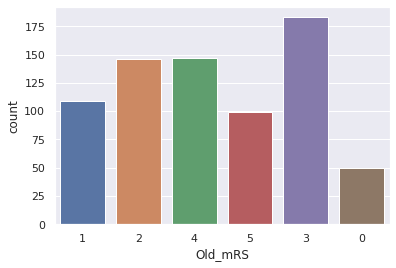

In [340]:
# Print the histogram of the old_status
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(data=validation_df, x="Old_mRS")

In [341]:
print("The number of different New Status")
print(validation_df["30_Days_mRs"].value_counts())

The number of different New Status
0           226
1           157
6           105
3            68
4            63
2            52
6（death）     22
5            17
3（好转）         7
4（好转）         4
/             3
unknown       2
4（复发）         2
1（好转）         2
0?            2
1（复发）         1
2（好转）         1
Name: 30_Days_mRs, dtype: int64


In [342]:
for i in validation_df.index[validation_df['30_Days_mRs'] == "6（death）"].tolist():
  validation_df.at[i, "30_Days_mRs"] = 6

for i in validation_df.index[validation_df['30_Days_mRs'] == "3（好转）"].tolist():
  validation_df.at[i, "30_Days_mRs"] = 3

for i in validation_df.index[(validation_df['30_Days_mRs'] == "4（复发）") | (validation_df['30_Days_mRs'] == "4（好转）")].tolist():
  validation_df.at[i, "30_Days_mRs"] = 4

for i in validation_df.index[(validation_df['30_Days_mRs'] == "1（复发）") | (validation_df['30_Days_mRs'] == "1（好转）")].tolist():
  validation_df.at[i, "30_Days_mRs"] = 1

for i in validation_df.index[validation_df['30_Days_mRs'] == "2（好转）"].tolist():
  validation_df.at[i, "30_Days_mRs"] = 2

In [343]:
validation_df = validation_df[(validation_df["30_Days_mRs"] != "unknown") & (validation_df["30_Days_mRs"] != "/") & (validation_df["30_Days_mRs"] != "0?")]

In [344]:
print("The number of different New Status")
print(validation_df["30_Days_mRs"].value_counts())

The number of different New Status
0    223
1    155
6    100
3     68
4     62
2     51
6     28
5     17
3      8
4      7
1      6
2      2
Name: 30_Days_mRs, dtype: int64


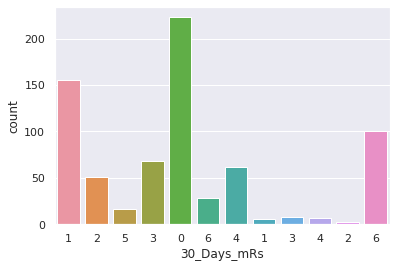

In [345]:
# Print the histogram of the new_status
sns.countplot(data=validation_df, x="30_Days_mRs")

In [346]:
validation_df.shape[0]

727

In [347]:
# Save as csv
validation_df.to_csv("external_validation_cleaned.csv", index_col=False)

In [4]:
validation_df = pd.read_csv("/content/external_validation_cleaned.csv")

In [5]:
validation_df

,Accession_Number,occlusion_or_not,Old_mRS,30_Days_mRs,Acute_or_chronic,Patient_Sex,Patient_Age,vessels,Passes_time,X_ShamAccessionNumber,Location
0,29245949,occlusion,1,1,chronic,Male,65,left mid M1 branch,NaN,29245949,NaN
1,28986404,occlusion,2,2,chronic,Male,53,proximal M1 segment of the right MCA,NaN,28986404,NaN
2,27433774,occlusion,4,5,chronic,Male,73,left M1,NaN,27433774,NaN
3,29284027,occlusion,2,1,chronic,Female,77,left vertebral artery at its origin,NaN,29284027,NaN
4,29203810,occlusion,2,1,chronic,Male,92,proximal left M2segment,NaN,29203810,NaN
...,...,...,...,...,...,...,...,...,...,...,...
722,29588050,occlusion,2,1,chronic,Male,71,distal M4 branch,NaN,29588050,NaN
723,29560819,occlusion,3,3,acute,Male,63,left M2 inferior-posterior division branch,NaN,29560819,NaN
724,29558031,occlusion,3,0,chronic,Female,72,Left internal carotid artery and left vertebr...,NaN,29558031,NaN
725,29545933,occlusion,3,3,chronic,Male,72,bilateral V4 segments and proximal basilar,NaN,29545933,NaN
